In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test  = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df.shape, df_test.shape

((1460, 81), (1459, 80))

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1 - EDA
- **53% categorical features**
- **Counting null values**
    - **PoolQC:**  1453 (99%)
    - **MiscFeature:** 1406 (96%)
    - **Alley:** 1369 (94%)
    - **Fence:** 1179 (81%)
    - **FireplaceQu:**     690 (47%)
    - **LotFrontage:**     259 (18%)
- **32 of 48 categorical features have low data variance**
    - **MSZoning:** RL (79%)
    - **Street** Pave (99%)
    - **LotShape**: Reg (63%)
    - **LandContour**: Lvl (90%)
    - **Utilities**: AllPub (99,9%)
    - **LotConfig**: Inside (72%)
    - **LandSlope**: Gtl (95%)
    - **Condition1**: Norm (88%)
    - **Condition2**: Norm (99%)
    - **BldgType**: 1Fam (84%)
    - **HouseStyle**: 1Story (50%)
    - **RoofStyle**: Gable (78%)
    - **RoofMatl**: CompShg (98%)
    - **ExterQual**: TA (62%)
    - **ExterCond**: TA (88%)
    - **BsmtCond**: TA (92%)
    - **BsmtExposure**: No (64%)
    - **BsmtFinType2**: Unf (89%)
    - **Heating**: GasA (98%)
    - **HeatingQC**: Ex (51%)
    - **CentralAir**: Y (93%)
    - **Electrical**: SBrkr (91%)
    - **KitchenQual**: TA (50%)
    - **Functional**: Typ (93%)
    - **GarageType**: Attchd (63%)
    - **GarageQual**: TA (95%)
    - **GarageCond**: TA (96%)
    - **PavedDrive**: Y (91%)
    - **PavedDrive**: MnPrv (56%)
    - **MiscFeature**: Shed (90%)
    - **SaleType** WD (88%)
    - **SaleCondition** Normal (92%)
- **16 of 38 numerical features have many outliers**
    - LotArea
    - BsmtFinSF2
    - BsmtUnfSF
    - TotalBsmtSF
    - 1stFlrSF
    - LowQualFinSF
    - GrLivArea
    - GarageArea
    - WoodDeckSF
    - OpenPorchSF
    - EnclosedPorch
    - 3SsnPorch
    - ScreenPorch
    - PoolArea
    - MiscVal
    - SalePrice **(target)**
- **Features correlated with the target**
    - OverallQual *(Classifica o material geral e o acabamento da casa)* (79%)
    - GrLivArea *(Área de estar acima do nível (chão) pés quadrados)* (71%)
    - GarageCars *(Tamanho da garagem em capacidade de carro)* (64%)
    - GarageArea *(Tamanho da garagem em metros quadrados)* (62%)
    - TotalBsmtSF *(Total de metros quadrados de área do porão)* (61%) 
    - 1stFlrSF *(Pés quadrados do primeiro andar)* (61%)

In [12]:
# Imports
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Get categorical and numerics features
feat_cat = df.select_dtypes(include = object).columns
feat_num = df.select_dtypes(exclude = object).columns
feat_cat, feat_num

(Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition'],
       dtype='object'),
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
        'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 

In [10]:
print(f'{feat_cat.shape[0]} categorical features\n{feat_num.shape[0]} numerical features (target is included)')

43 categorical features
38 numerical features (target is included)


In [11]:
# Counting Null Values
null_sum = df.isnull().sum()
null_sum[null_sum > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
# Unique categorical values
unique_values = dict()
for f in feat_cat:
    print(df[f].value_counts().head())
    print('-'*50)
    
    unique_values[f] = list( df[f].unique() )

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
--------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------------------------------

IndexError: index 38 is out of bounds for axis 0 with size 38

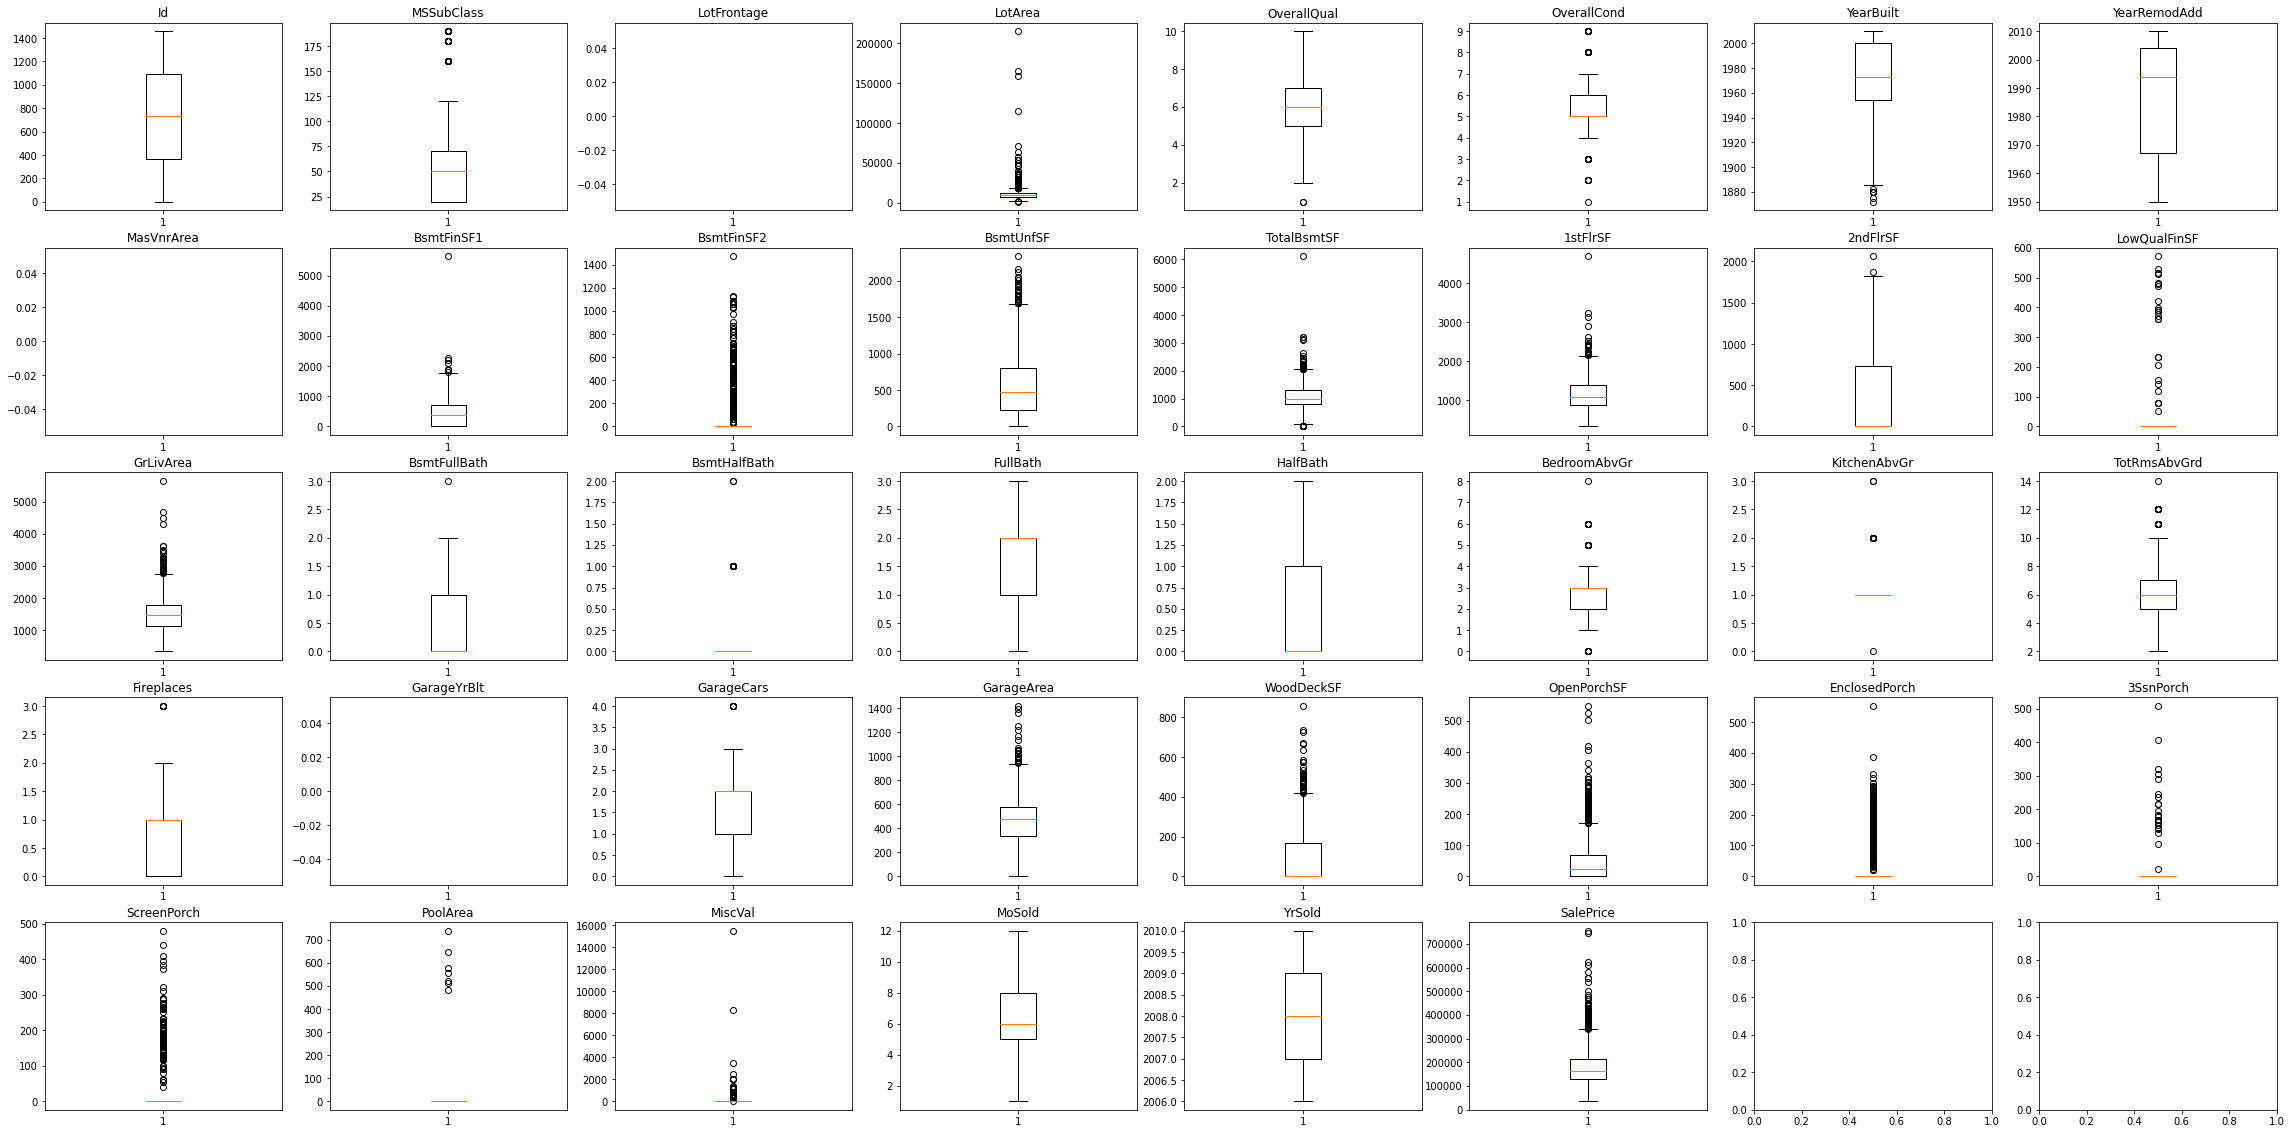

In [13]:
# Outliers
rows, columns = 5, 8
fig, axes = plt.subplots(rows, columns, figsize=(40, 20))
axes = axes.ravel()
for i in range(rows*columns):
    column = feat_num[i]
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
plt.subplots_adjust(wspace = 0.5)

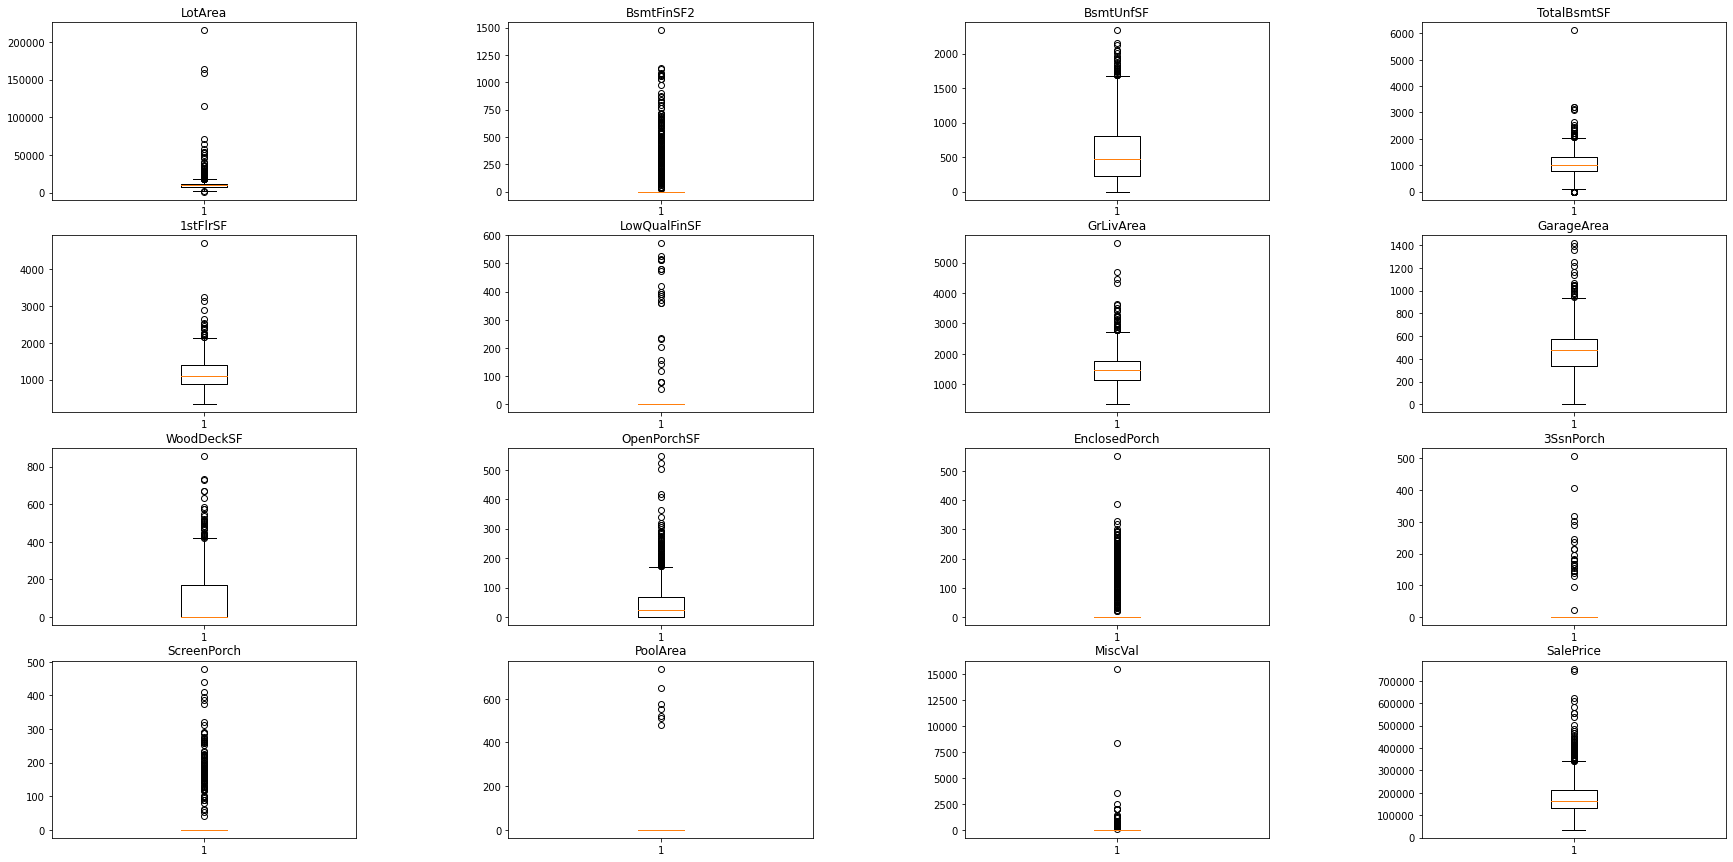

In [14]:
# Numerical features with many outliers | Atributos numéricos com muitos outliers
features_outliers = ['LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF','GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
# Outliers
rows, columns = 4, 4
fig, axes = plt.subplots(rows, columns, figsize=(30, 15))
axes = axes.ravel()
for i in range(rows*columns):
    column = features_outliers[i]
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
plt.subplots_adjust(wspace = 0.5)

In [15]:
# Data Multicollinearity
## It is not possible to analyze the multicollinearity of the data because there are null values. Let's perform this step in handling nulls.
## Não é possível analisar a multicolinearidade dos dados porque existem valores nulos. Vamos executar essa etapa no tratamento de nulos.

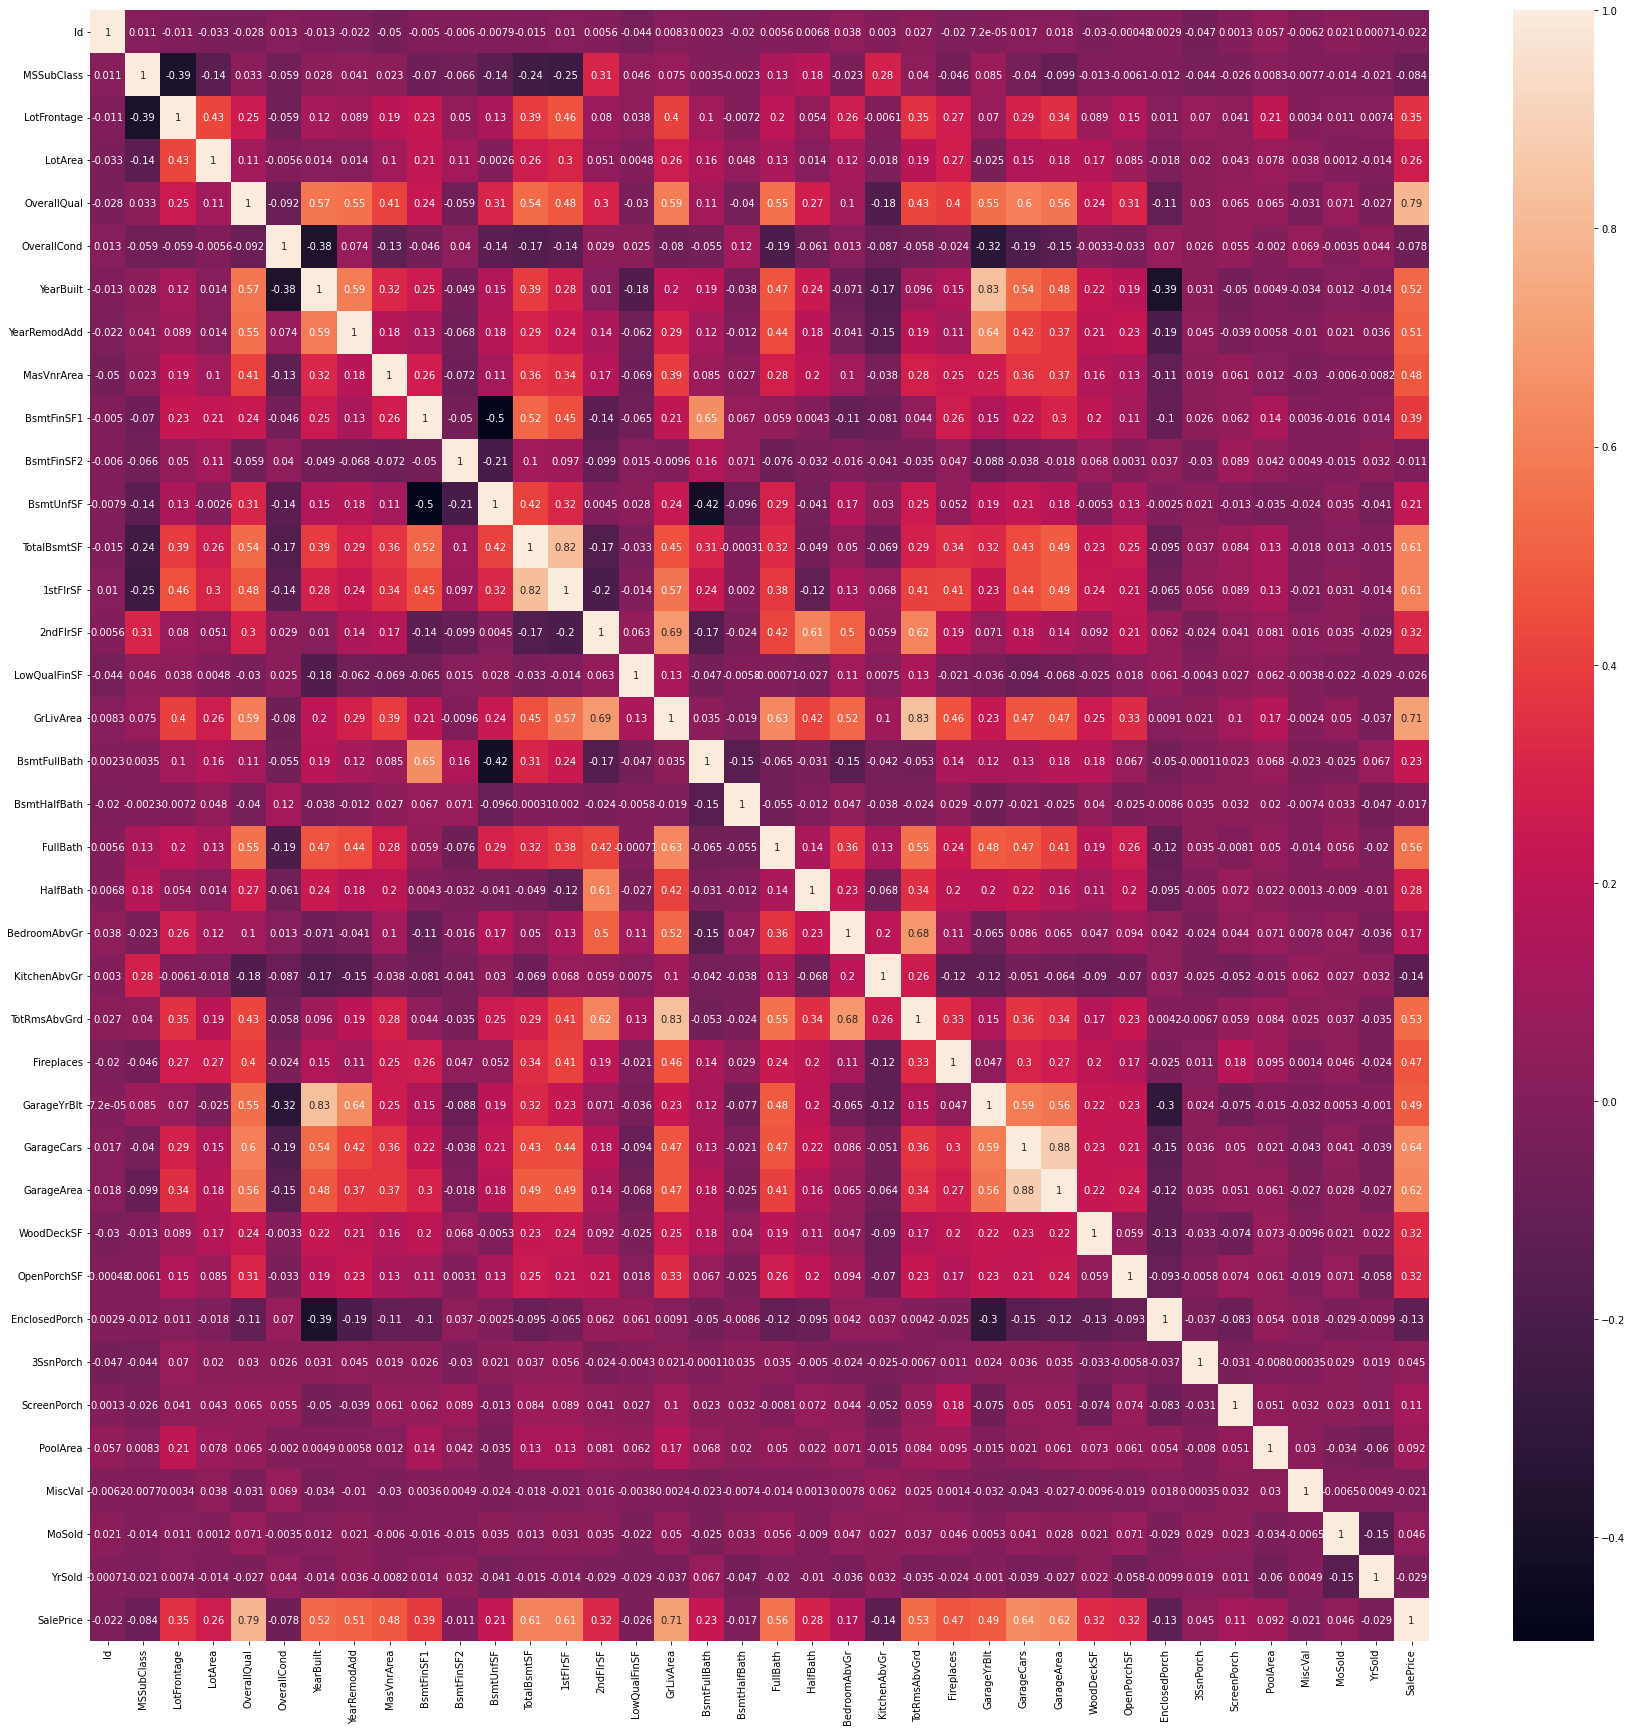

In [16]:
# Data Correlation
fig = plt.figure(figsize = (30, 30))
sns.heatmap(df.corr(), annot = True);

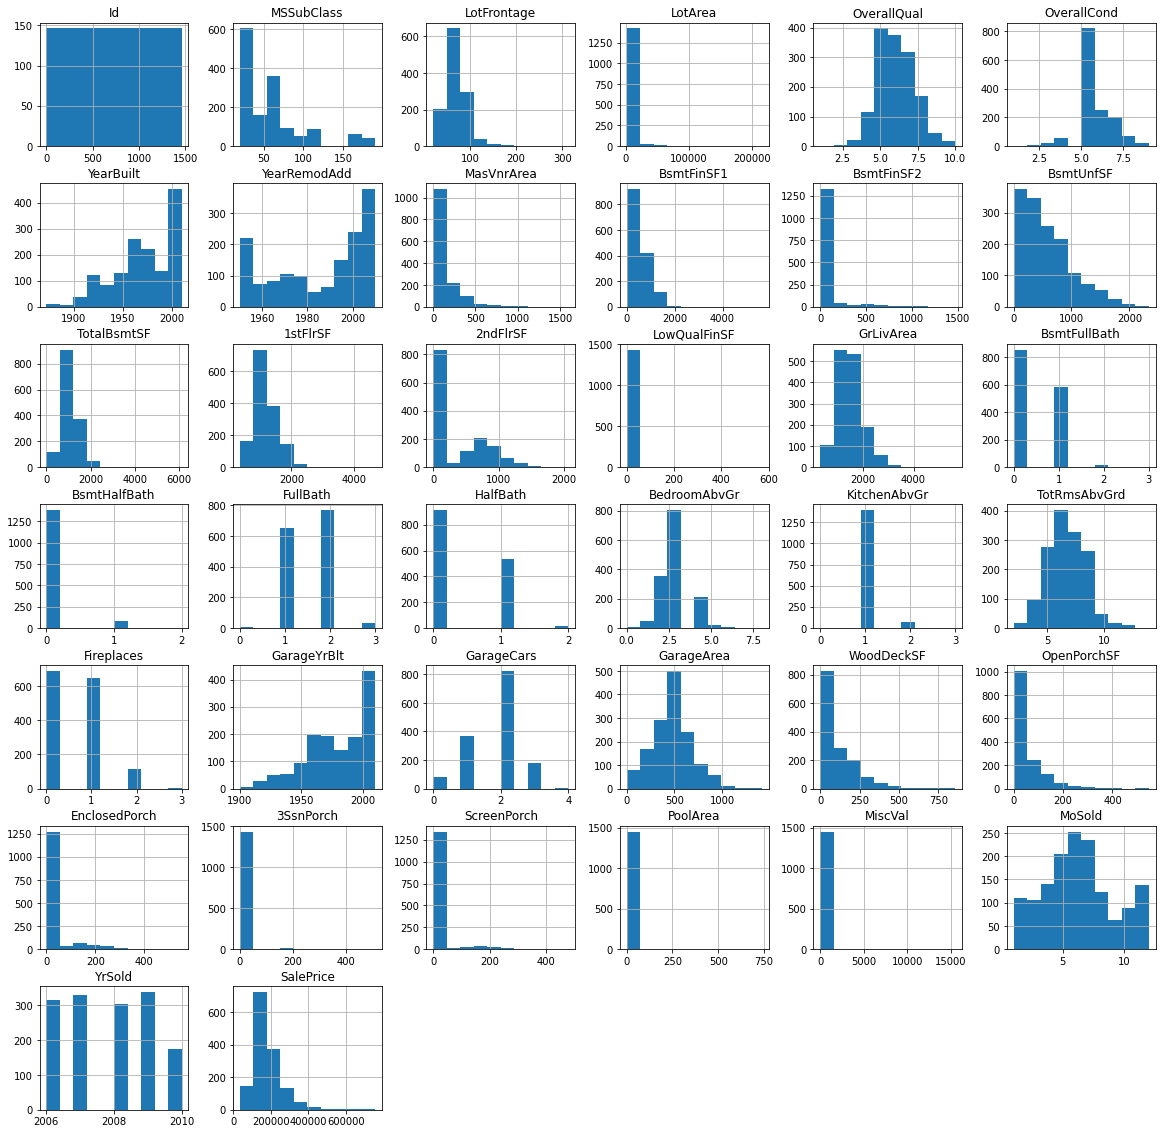

In [17]:
# Data distribution
df.hist(figsize = (20, 20));

# 2 - Data Pre-processing

In [222]:
# Imports
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from category_encoders.glmm import GLMMEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose  import ColumnTransformer

In [228]:
# Remove columns with many null values or columns with low variance
many_nan_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']


low_variance_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1'
                        ,'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'BsmtCond'
                        , 'BsmtExposure', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional'
                        , 'GarageType', 'GarageQual', 'GarageCond', 'PavedDrive', 'PavedDrive', 'SaleType', 'MiscFeature', 'SaleCondition']

removed_columns = list(set(many_nan_columns + low_variance_columns))

df.drop(removed_columns, inplace = True, axis = 1)
df_test.drop(removed_columns,  inplace = True, axis = 1)

In [229]:
def not_removed_columns(columns):
    return [column for column in columns if column not in removed_columns]

In [230]:
# Split features and target
X_train, y_train = df.drop(['SalePrice', 'Id'], axis = 1), df['SalePrice']
X_test = df_test.drop(['Id'], axis = 1)
X_train.shape, y_train.shape, X_test.shape

((1460, 43), (1460,), (1459, 43))

In [231]:
ordinal_columns_dict = {  'Street'      : ['Grvl', 'Pave']
, 'Alley'       : ['NA' , 'Grvl', 'Pave']
, 'LotShape'    : ['IR3', 'IR2', 'IR1', 'Reg']
, 'Utilities'   : ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
, 'ExterQual'   : ['Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'ExterCond'   : ['Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'BsmtQual'    : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'BsmtCond'    : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA']
, 'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
, 'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
, 'HeatingQC'   : ['Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'KitchenQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'FireplaceQu' : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'GarageQual'  : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'GarageCond'  : ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
, 'PavedDrive'  : ['N', 'P', 'Y']
, 'PoolQC'      : ['NA', 'Fa', 'TA', 'Gd', 'Ex']
}

ordinal_columns = list(ordinal_columns_dict.keys())
ordinal_columns = not_removed_columns(ordinal_columns)

ordinal_columns_categories = [list(v) for k, v in ordinal_columns_dict.items() if k in ordinal_columns]

In [232]:
nominal_columns = ['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                   'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                   'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                   'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType',
                   'GarageFinish', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

nominal_columns = not_removed_columns(nominal_columns)

In [233]:
numerical_columns = list(feat_num)
numerical_columns.remove('Id')
numerical_columns.remove('SalePrice')

numerical_columns = not_removed_columns(numerical_columns)

In [234]:
ordinal_transformer   = Pipeline(steps = [('ord', OrdinalEncoder(categories = ordinal_columns_categories,
                                                                 handle_unknown = 'use_encoded_value', unknown_value  = np.nan))])
nominal_transformer   = Pipeline(steps = [('glmm', GLMMEncoder())])
numerical_transformer = Pipeline(steps = [('minmax', MinMaxScaler())])
imputer_transformer   = Pipeline(steps = [('imputer', KNNImputer(n_neighbors = 1))])

In [235]:
# Transform all columns
transformer = ColumnTransformer(transformers = [
      ('ord', ordinal_transformer, ordinal_columns)
    , ('nom', nominal_transformer, nominal_columns)
    , ('num', numerical_transformer, numerical_columns)
], verbose = True)

# NaN Imputer
imputer = ColumnTransformer(transformers = [
    ('impt', imputer_transformer, list(range(len(ordinal_columns + numerical_columns + nominal_columns))) )
], verbose = True)

# Normalizing the nominal categorical attributes, they obtained values with high scale 
transformer2 = ColumnTransformer(transformers = [
    ('nom-minmax', numerical_transformer, [i for i in range(len(ordinal_columns), len(ordinal_columns)+len(nominal_columns))])
], verbose = True, remainder = 'passthrough')

In [236]:
preprocessor = Pipeline(
    steps = [('transformer', transformer), ('imputer', imputer), ('transformer2', transformer2)]
)

In [237]:
X_train = preprocessor.fit_transform(X_train, y_train)
X_test  = preprocessor.transform(X_test)

[ColumnTransformer] ........... (1 of 3) Processing ord, total=   0.0s
[ColumnTransformer] ........... (2 of 3) Processing nom, total=   0.9s
[ColumnTransformer] ........... (3 of 3) Processing num, total=   0.0s
[ColumnTransformer] .......... (1 of 1) Processing impt, total=   0.0s
[ColumnTransformer] .... (1 of 2) Processing nom-minmax, total=   0.0s
[ColumnTransformer] ..... (2 of 2) Processing remainder, total=   0.0s


In [238]:
X_train = pd.DataFrame(X_train, columns = nominal_columns + ordinal_columns + numerical_columns)
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageFinish,BsmtQual,BsmtFinType1,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.416358,0.869824,0.863807,0.462956,1.000000,0.720767,4.0,6.0,0.235294,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.579629,0.286753,0.247707,0.029362,0.331865,0.720767,4.0,5.0,0.000000,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.416358,0.869824,0.863807,0.462956,1.000000,0.720767,4.0,6.0,0.235294,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.469895,0.290763,0.366252,0.029362,0.180028,0.279701,3.0,5.0,0.294118,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,1.000000,0.869824,0.863807,0.462956,1.000000,0.720767,4.0,6.0,0.235294,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [239]:
X_test = pd.DataFrame(X_test, columns = nominal_columns + ordinal_columns + numerical_columns)
X_test.head()

,Neighborhood,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageFinish,BsmtQual,BsmtFinType1,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.191739,0.869824,0.863807,0.029362,0.331865,0.279701,3.0,3.0,0.000000,0.048246,0.444444,0.625,0.644928,0.183333,0.0000,0.082920,0.097693,0.115582,0.144354,0.128958,0.000000,0.0,0.105878,0.0,0.0,0.333333,0.0,0.250,0.333333,0.250000,0.000000,0.554545,0.25,0.514810,0.163361,0.000000,0.0,0.0,0.25,0.0,0.000000,0.454545,1.0
1,0.191739,0.290763,0.234699,0.462956,0.331865,0.279701,3.0,5.0,0.000000,0.060609,0.555556,0.625,0.623188,0.133333,0.0675,0.163536,0.000000,0.173801,0.217512,0.228316,0.000000,0.0,0.187453,0.0,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.000000,0.527273,0.25,0.220028,0.458576,0.065814,0.0,0.0,0.00,0.0,0.806452,0.454545,1.0
2,0.394211,0.869824,0.863807,0.029362,1.000000,1.000000,4.0,6.0,0.235294,0.058566,0.444444,0.500,0.905797,0.800000,0.0000,0.140149,0.000000,0.058647,0.151882,0.136301,0.339467,0.0,0.243971,0.0,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.881818,0.50,0.339915,0.247375,0.062157,0.0,0.0,0.00,0.0,0.000000,0.181818,1.0
3,0.394211,0.869824,0.863807,0.462956,1.000000,1.000000,3.0,6.0,0.235294,0.040562,0.555556,0.625,0.913043,0.800000,0.0125,0.106662,0.000000,0.138699,0.151555,0.135842,0.328329,0.0,0.239261,0.0,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.890909,0.50,0.331453,0.420070,0.065814,0.0,0.0,0.00,0.0,0.000000,0.454545,1.0
4,0.889047,0.409599,0.416735,0.029362,1.000000,0.720767,4.0,5.0,0.588235,0.017318,0.777778,0.500,0.869565,0.700000,0.0000,0.046598,0.000000,0.435360,0.209493,0.217072,0.000000,0.0,0.178222,0.0,0.0,0.666667,0.0,0.250,0.333333,0.250000,0.000000,0.836364,0.50,0.356841,0.000000,0.149909,0.0,0.0,0.30,0.0,0.000000,0.000000,1.0


3 - Seleção de features
- Implementação
    - https://machinelearningmastery.com/feature-selection-with-categorical-data/
    - https://machinelearningmastery.com/feature-selection-for-regression-data/
- Modelos baseados em árvore  
- Modelos lineares  

4 - Hiperparametrização  

5 - Avaliação  
